In [45]:
import sqlalchemy 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session 
import pandas as pd
from sqlalchemy import create_engine, func
database_path = "hawaii.sqlite"
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
engine = create_engine(f"sqlite:///{database_path}")

In [7]:
Base = automap_base()
Base.prepare(engine,reflect=True)

In [8]:
Base.classes.keys()

['measurement', 'station']

In [9]:
Measurement = Base.classes.measurement 

In [10]:
Station = Base.classes.station

In [11]:
session = Session(engine)

In [12]:
session.query(func.count(Station.station)).all()

[(9)]

In [13]:
session.query(Measurement.station,Measurement.tobs).all()

[('USC00519397', 65.0),
 ('USC00519397', 63.0),
 ('USC00519397', 74.0),
 ('USC00519397', 76.0),
 ('USC00519397', 73.0),
 ('USC00519397', 70.0),
 ('USC00519397', 64.0),
 ('USC00519397', 68.0),
 ('USC00519397', 73.0),
 ('USC00519397', 64.0),
 ('USC00519397', 61.0),
 ('USC00519397', 66.0),
 ('USC00519397', 65.0),
 ('USC00519397', 68.0),
 ('USC00519397', 64.0),
 ('USC00519397', 72.0),
 ('USC00519397', 66.0),
 ('USC00519397', 66.0),
 ('USC00519397', 69.0),
 ('USC00519397', 67.0),
 ('USC00519397', 67.0),
 ('USC00519397', 71.0),
 ('USC00519397', 67.0),
 ('USC00519397', 76.0),
 ('USC00519397', 68.0),
 ('USC00519397', 72.0),
 ('USC00519397', 70.0),
 ('USC00519397', 67.0),
 ('USC00519397', 66.0),
 ('USC00519397', 67.0),
 ('USC00519397', 69.0),
 ('USC00519397', 67.0),
 ('USC00519397', 67.0),
 ('USC00519397', 64.0),
 ('USC00519397', 69.0),
 ('USC00519397', 73.0),
 ('USC00519397', 73.0),
 ('USC00519397', 69.0),
 ('USC00519397', 69.0),
 ('USC00519397', 69.0),
 ('USC00519397', 71.0),
 ('USC00519397',

In [48]:

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [30]:
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_ago)


2016-08-23


In [47]:
YearBeg = dt.datetime(2016,8,23)


In [49]:
YearEnd = dt.datetime(2017,8,24)

In [50]:
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > YearBeg).filter(Measurement.date < YearEnd).all()

In [51]:
OneYearDates = [r[0] for r in results]
OneYearPrcp = [r[1] for r in results]

In [52]:
PrcpbyD = pd.DataFrame({'date':OneYearDates,'precipitation':OneYearPrcp})
PrcpbyD.set_index('date',inplace=True)
PrcpbyD.head()

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


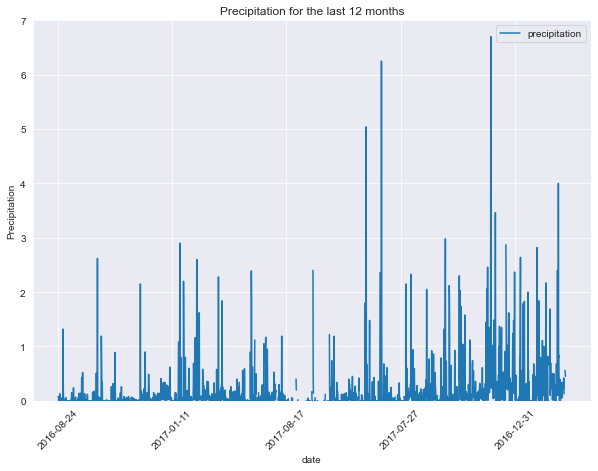

In [46]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,7))
PrcpbyD.plot(ax=ax)


ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_ylim(0,max(PrcpbyD['precipitation']+.3))
ax.set_title("Precipitation for the last 12 months")
ax.set_ylabel("Precipitation")
ax.set_xlabel("date")
plt.xticks(rotation=45)
plt.savefig("3a.precipitation_last_12_months.png")
plt.show()

In [53]:
PrcpbyD.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [76]:
NumStation = session.query(Measurement).group_by(Measurement.station).count()
NumStation1 = session.query(Station).group_by(Station.station).count()
print(f"{NumStation} stations from Measurement table and {NumStation1} stations from Station table")

9 stations from Measurement table and 9 stations from Station table


In [86]:
Active = session.query(Measurement.station, Station.name, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

Active 

[('USC00519281', 'WAIKIKI 717.2, HI US', 24948),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 24516),
 ('USC00513117', 'WAIKIKI 717.2, HI US', 24381),
 ('USC00519523', 'WAIKIKI 717.2, HI US', 24021),
 ('USC00516128', 'WAIKIKI 717.2, HI US', 23508),
 ('USC00514830', 'WAIKIKI 717.2, HI US', 19818),
 ('USC00511918', 'WAIKIKI 717.2, HI US', 17811),
 ('USC00517948', 'WAIKIKI 717.2, HI US', 12348),
 ('USC00518838', 'WAIKIKI 717.2, HI US', 4599)]

In [98]:
GetTemp = session.query(func.max(Measurement.tobs),func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").all()

GetTemp

[(85.0, 54.0, 71.66378066378067)]

In [99]:
results = session.query(Measurement.tobs).\
filter(Measurement.station== "USC00519281").filter(Measurement.date >= YearBeg).all()

In [100]:
results_df=pd.DataFrame(results,columns=["tobs"])

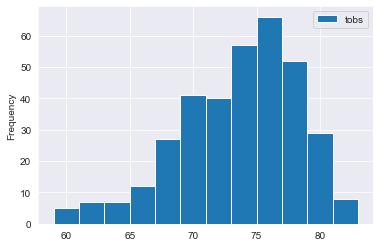

In [103]:
results_df.plot.hist(bins=12)
ax.set_title("Frequency of the Tobs")
ax.set_ylabel("Frequency")
plt.savefig("3b.frequency_of_the_tobs.png")
plt.show()

In [105]:
VacaBeg = dt.datetime(2017,7,1) 
VacaEnd = dt.datetime(2017,7,15) 

calc_temp = session.query(func.avg(Measurement.tobs),func.max(Measurement.tobs),func.min(Measurement.tobs)).\
    filter(Measurement.date > VacaBeg).filter(Measurement.date < VacaEnd).statement

TempStat = pd.read_sql_query(calc_temp, session.bind)
TempStat

,avg_1,max_1,min_1
0,78.295455,87.0,69.0
